<a href="https://colab.research.google.com/github/lcuestas/prueba/blob/main/PruebaDane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba Técnica – Análisis y automatización de Datos

Este texto tiene como principal propósito realizar un análisis descriptivo del mercado de bienes raíces en EE. UU., con el fin de identificar patrones de comportamiento en los precios de venta, evaluar la relación entre el valor tasado y el valor real de las propiedades, y explorar tendencias por tipo de propiedad y ubicación geográfica.

En primer momento se analizará las siguientes variables encontradas en el dataset de Oficina de Política y Gestión del Estado de Connecticut (Connecticut Office of Policy and Management – OPM).

Este conjunto de datos contiene información sobre todas las ventas de bienes raíces registradas en el estado de Connecticut (EE. UU.) entre los años 2001 y 2018. Los datos provienen de los tasadores municipales y se utilizan principalmente para la evaluación fiscal de propiedades y el análisis del mercado inmobiliario.



| **Variable**           | **Descripción**                                                                 |
|------------------------|----------------------------------------------------------------------------------|
| `Town`                 | Ciudad o localidad donde se ubica la propiedad.                                 |
| `Address`              | Dirección completa del inmueble vendido.                                       |
| `Assessed Value`       | Valor de tasación de la propiedad según registros oficiales.                   |
| `Sale Amount`          | Precio real de venta de la propiedad.                                          |
| `Sales Ratio`          | Relación entre el precio de venta y el valor tasado (`Sale Amount / Assessed Value`). |
| `Property Type`        | Tipo general de propiedad (por ejemplo: Residential, Commercial, etc.).        |
| `Residential Type`     | Clasificación específica de uso residencial (Single Family, Condo, Two Family, etc.). |
| `Non Use Code`         | Código relacionado con propiedades que no tienen uso típico o están exentas.   |
| `Assessor Remarks`     | Comentarios del tasador relacionados con la venta o la propiedad.              |
| `OPM Remarks`          | Observaciones adicionales del Departamento de Gestión de Políticas (u otra entidad). |
| `Location`             | Información geográfica más precisa (puede incluir latitud/longitud o zona específica). |


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Real_Estate_Sales_2001-2022_GL.csv")

print(df.info())

<ipython-input-38-86d3c2a5559d>:5: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Real_Estate_Sales_2001-2022_GL.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB
None


A continuación, se muestra una analisis descriptivo de las variables númericas y de relevancia para el estudio:

| **Variable**       | **Análisis** |
|--------------------|--------------|
| **Assessed Value** | Valor tasado promedio de las propiedades del condado estaán alrededor de:**$314,589** USD. Los valores ascienden desde los 0 hasta **$114,924,200** USD. |
| **Sale Amount**    | Sin embaargo, cuando se observa el Monto promedio de venta se obtiene un promedio mayor: **$578,509**. Máximo: **$5,000,000,000**, mínimo: **$0**. Lo que podría indicar que los avaluos impuestos por el estado son menores a los que se están colocando en el mercado. |
| **Sales Ratio**    | Promedio: **0.98**, lo cual sugiere que los precios de venta suelen estar cerca del valor tasado. Máximo: **1097.02**, mínimo: **0**. |

In [29]:
print(df.describe())

       Serial Number     List Year  Assessed Value   Sale Amount   Sales Ratio
count   1.097629e+06  1.097629e+06    1.097629e+06  1.097629e+06  1.097629e+06
mean    5.370357e+05  2.011218e+03    2.818016e+05  4.053146e+05  9.603926e+00
std     7.526074e+06  6.773485e+00    1.657890e+06  5.143492e+06  1.801664e+03
min     0.000000e+00  2.001000e+03    0.000000e+00  0.000000e+00  0.000000e+00
25%     3.071300e+04  2.005000e+03    8.909000e+04  1.450000e+05  4.778667e-01
50%     8.070600e+04  2.011000e+03    1.405800e+05  2.330000e+05  6.105663e-01
75%     1.703410e+05  2.018000e+03    2.282700e+05  3.750000e+05  7.707200e-01
max     2.000500e+09  2.022000e+03    8.815100e+08  5.000000e+09  1.226420e+06


Debido a estos outliers que podrían modificar los datos se realizan los siguientes filtros con el fin de no modificar la tendencia de la base de datos y los datos filtrados no superan el 5% del total de registros:

In [39]:
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')
df = df[(df['Sale Amount'] > 0) & (df['Assessed Value'] > 0)]

df = df[df['Date Recorded'].notna()]
df = df[df['Date Recorded'].dt.year >= 2000]
df = df[df['Sale Amount'] < 1e7]
df = df[df['Sale Amount'] > 10000]

df = df[df['Assessed Value'] < 1e7]
df = df[df['Assessed Value'] > 10000]

df = df[(df['Sales Ratio'] > 0) & (df['Sales Ratio'] < 4)]
print(df.describe())

       Serial Number     List Year                  Date Recorded  \
count   1.054443e+06  1.054443e+06                        1054443   
mean    5.459336e+05  2.011289e+03  2012-07-24 06:28:40.657446144   
min     2.100000e+01  2.001000e+03            2001-08-01 00:00:00   
25%     3.075900e+04  2.005000e+03            2005-11-28 00:00:00   
50%     9.002100e+04  2.012000e+03            2012-10-05 00:00:00   
75%     1.704740e+05  2.018000e+03            2018-11-08 00:00:00   
max     2.000500e+09  2.022000e+03            2023-09-29 00:00:00   
std     7.620322e+06  6.773185e+00                            NaN   

       Assessed Value   Sale Amount   Sales Ratio  
count    1.054443e+06  1.054443e+06  1.054443e+06  
mean     2.217799e+05  3.662728e+05  6.892443e-01  
min      1.001000e+04  1.000100e+04  1.452113e-03  
25%      9.180000e+04  1.500000e+05  4.820000e-01  
50%      1.421000e+05  2.385000e+05  6.098400e-01  
75%      2.280000e+05  3.800000e+05  7.608734e-01  
max      9.930

Las ciudades con mayor cantidad de transacciones registradas son Stamford, Bridgeport y Waterbury, cada una con más de 31,000 registros. En cuanto al tipo de propiedad, predominan ampliamente las viviendas unifamiliares (Single Family), seguidas por las propiedades clasificadas como Residential y Condo. Esto indica un mercado inmobiliario principalmente residencial, con baja participación de terrenos vacíos, propiedades industriales o de uso público.

Por otro lado, la distribución del monto de venta (se muestra el 95% de los datos) muestra una concentración de transacciones por debajo de los 400,000 USD, con una alta frecuencia en el rango entre 100,000 y 300,000 USD. La distribución tiene una fuerte asimetría positiva, con una larga cola hacia valores altos, lo que sugiere la presencia de outliers que podrían influir en los promedios. Este comportamiento es típico en mercados donde unas pocas propiedades tienen valores extremadamente altos.

Town
Stamford         35208
Bridgeport       35118
Waterbury        31079
Norwalk          26064
New Haven        23185
West Hartford    21821
Danbury          21368
Hartford         18292
Milford          18043
Hamden           17961
Name: count, dtype: int64
Property Type
Single Family     395339
Residential       149508
Condo             102353
Two Family         25670
Three Family       11958
Vacant Land         6070
Commercial          5168
Four Family         2057
Apartments          1106
Industrial           745
Public Utility         8
Name: count, dtype: int64
Residential Type
Single Family    500873
Condo            133154
Two Family        34069
Three Family      15928
Four Family        2861
Name: count, dtype: int64


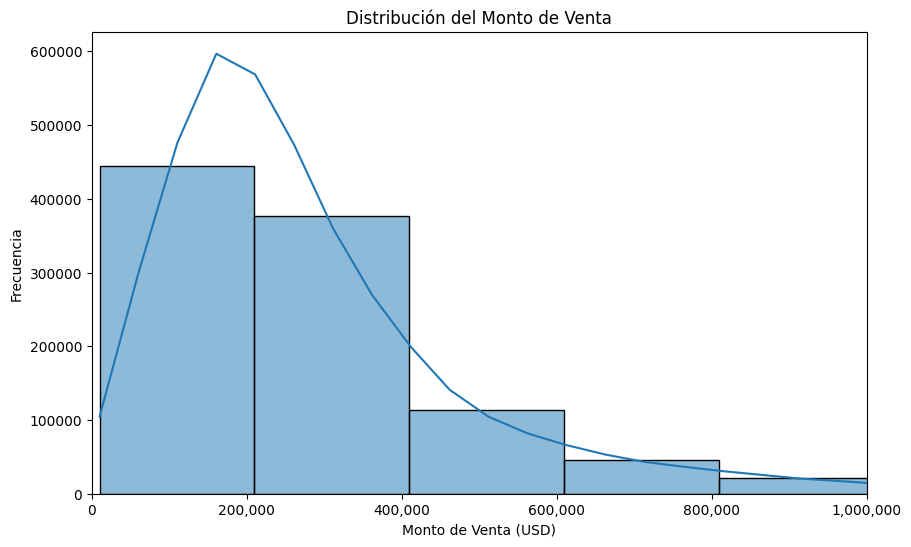

In [40]:
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])

print(df['Town'].value_counts().head(10))
print(df['Property Type'].value_counts())
print(df['Residential Type'].value_counts())

import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.histplot(df['Sale Amount'], bins=50, kde=True)
plt.title("Distribución del Monto de Venta")
plt.xlabel("Monto de Venta (USD)")
plt.ylabel("Frecuencia")
plt.xlim(0, df['Sale Amount'].quantile(0.95))

# Formatear los ticks del eje X con separador de miles
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

La distribución del valor tasado muestra que las propiedades son mayormente evaluadas por debajo de los 200,000 USD. La densidad cae rápidamente a medida que aumentan los valores, lo que indica que hay pocos inmuebles con tasaciones altas.

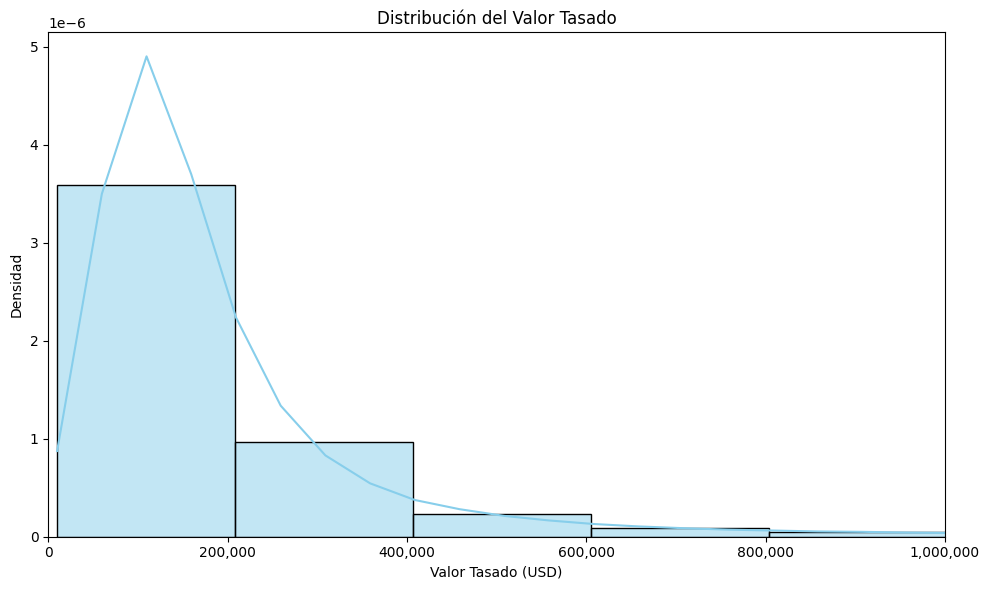

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.histplot(df['Assessed Value'], bins=50, kde=True, stat="density", color='skyblue', edgecolor='black')
plt.title("Distribución del Valor Tasado")
plt.xlabel("Valor Tasado (USD)")
plt.ylabel("Densidad")
plt.xlim(0, df['Sale Amount'].quantile(0.95))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

El histograma muestra la distribución del Sales Ratio, que representa la proporción entre el valor de venta y el valor tasado. La mayoría de las propiedades se vendieron por entre el 40 % y 80 % de su valor tasado, con un pico alrededor del 60 %. Aunque existen algunas propiedades vendidas por más de su valor tasado, son menos frecuentes. Esta distribución sugiere en general una subvaloración relativa en las ventas respecto a las tasaciones.

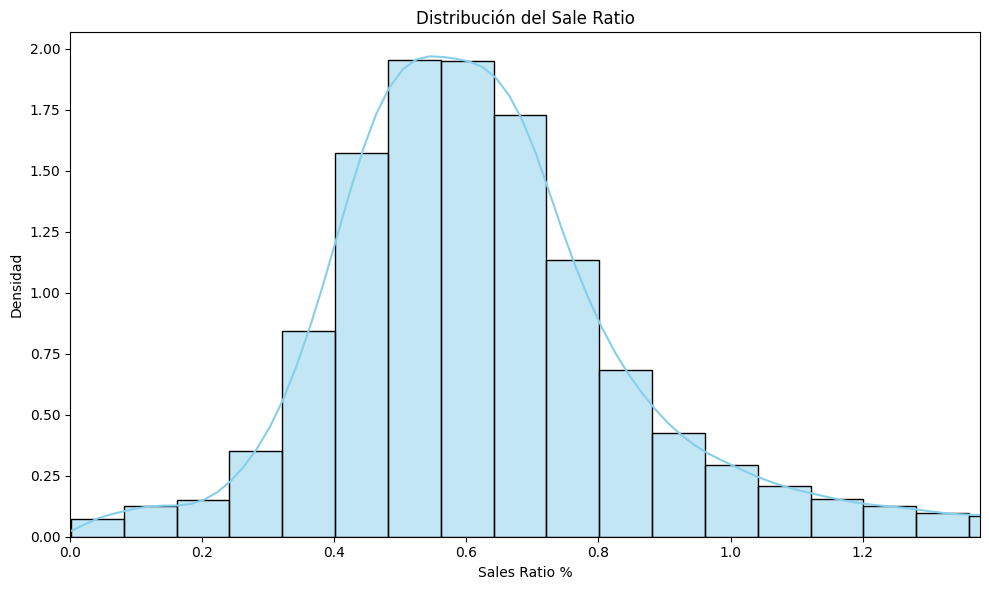

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.histplot(df['Sales Ratio'], bins=50, kde=True, stat="density", color='skyblue', edgecolor='black')
plt.title("Distribución del Sale Ratio")
plt.xlabel("Sales Ratio %")
plt.ylabel("Densidad")
plt.xlim(0, df['Sales Ratio'].quantile(0.95))
plt.tight_layout()
plt.show()

Los mapas comparativos muestran un crecimiento significativo en el número de propiedades vendidas por condado en Connecticut entre los años 2001 y 2022. En 2001, los valores eran relativamente bajos, con la mayoría de los condados mostrando menos de 700 propiedades, lo que refleja una baja actividad inmobiliaria. En contraste, en 2022 se observa un incremento drástico, especialmente en condados del suroeste y centro del estado (como Fairfield y New Haven), donde las ventas superan las 12,000 propiedades, lo que puede atribuirse al crecimiento poblacional, desarrollo urbano y cambios en el mercado inmobiliario a lo largo de las dos décadas.

<ipython-input-61-3f460bc5aad5>:38: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  joined = gpd.sjoin(gdf_año, ct_counties_base, predicate="within", how="inner")


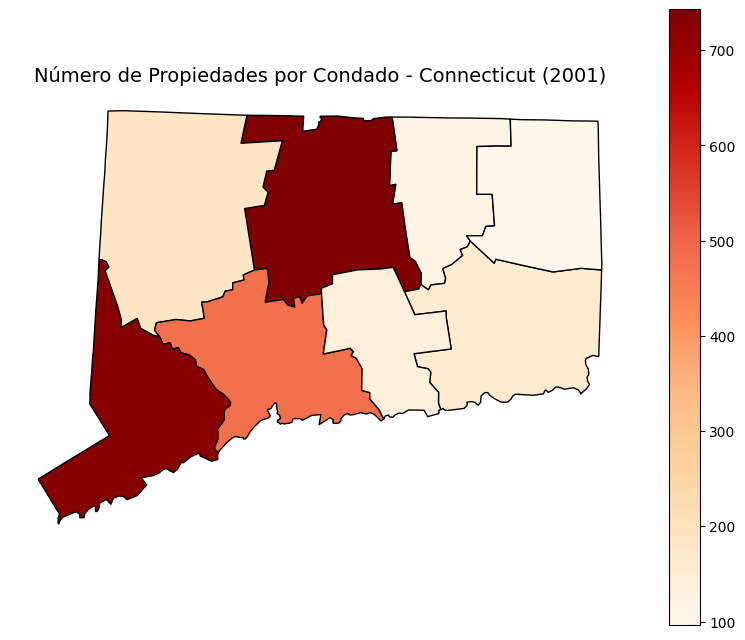

In [61]:
# Importar librerías
from shapely.wkt import loads
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile
import os

# -- Paso 1: Convertir fechas y limpiar --
df = df[df['Location'].notna()].copy()
df['Location'] = df['Location'].astype(str)
df['geometry'] = df['Location'].apply(loads)
df['Sale_Year'] = pd.to_datetime(df['Date Recorded']).dt.year  # Asegúrate de que la columna correcta sea "Date"

# Crear GeoDataFrame base
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# -- Paso 2: Extraer y cargar shapefile --
zip_path = "/content/cb_2021_us_county_5m.zip"
extract_folder = "/content/data_counties"
os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

for file in os.listdir(extract_folder):
    if file.endswith(".shp"):
        shapefile_path = os.path.join(extract_folder, file)
        break

counties = gpd.read_file(shapefile_path)

# -- Paso 3: Filtrar condados de Connecticut --
ct_counties_base = counties[counties['STATEFP'] == '09']

# -- Función para graficar por año --
def graficar_por_año(año):
    gdf_año = gdf[gdf['Sale_Year'] == año]
    joined = gpd.sjoin(gdf_año, ct_counties_base, predicate="within", how="inner")

    prop_counts = joined['NAME'].value_counts().reset_index()
    prop_counts.columns = ['NAME', 'Property Count']

    ct_counties = ct_counties_base.merge(prop_counts, on='NAME', how='left')
    ct_counties['Property Count'] = ct_counties['Property Count'].fillna(0)

    fig, ax = plt.subplots(figsize=(10, 8))
    ct_counties.plot(column='Property Count', cmap='OrRd', edgecolor='black', legend=True, ax=ax)
    plt.title(f'Número de Propiedades por Condado - Connecticut ({año})', fontsize=14)
    plt.axis('off')
    plt.show()

# -- Generar mapas para 2001 y 2022 --
graficar_por_año(2001)


<ipython-input-59-e60ce565b850>:38: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  joined = gpd.sjoin(gdf_año, ct_counties_base, predicate="within", how="inner")


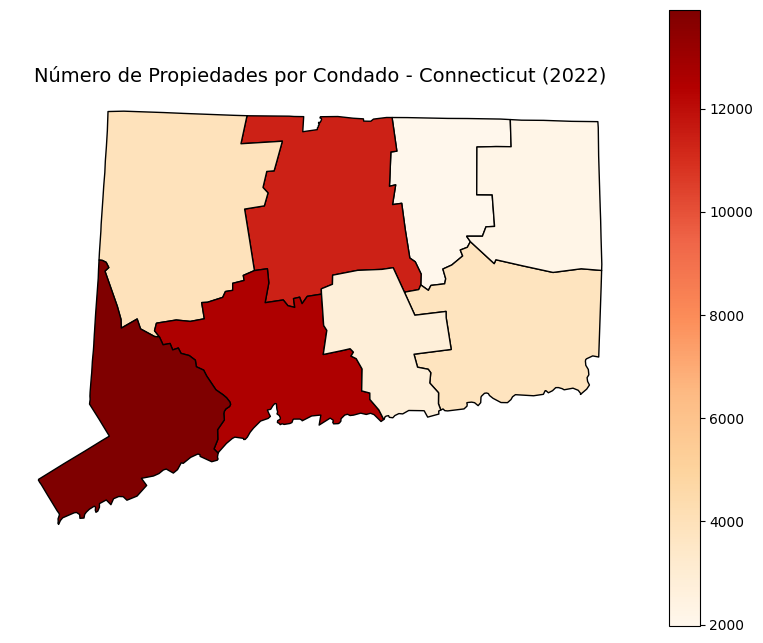

In [60]:
graficar_por_año(2022)

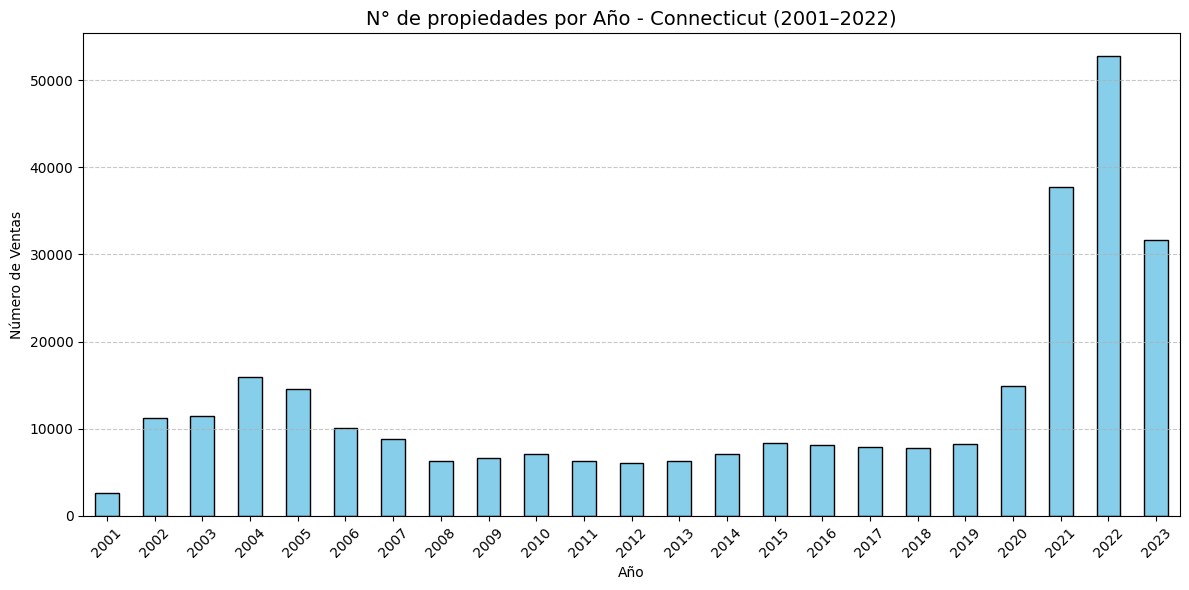

In [64]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt


# Asegúrate de que la columna 'Sale Date' esté en formato datetime
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')

# Crear columna 'Año' y 'Mes'
df['Year'] = df['Date Recorded'].dt.year
df['Month'] = df['Date Recorded'].dt.month

# Agrupar por año y contar número de ventas
sales_by_year = df.groupby('Year').size()

# Graficar
plt.figure(figsize=(12, 6))
sales_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("N° de propiedades por Año - Connecticut (2001–2022)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Número de Ventas")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


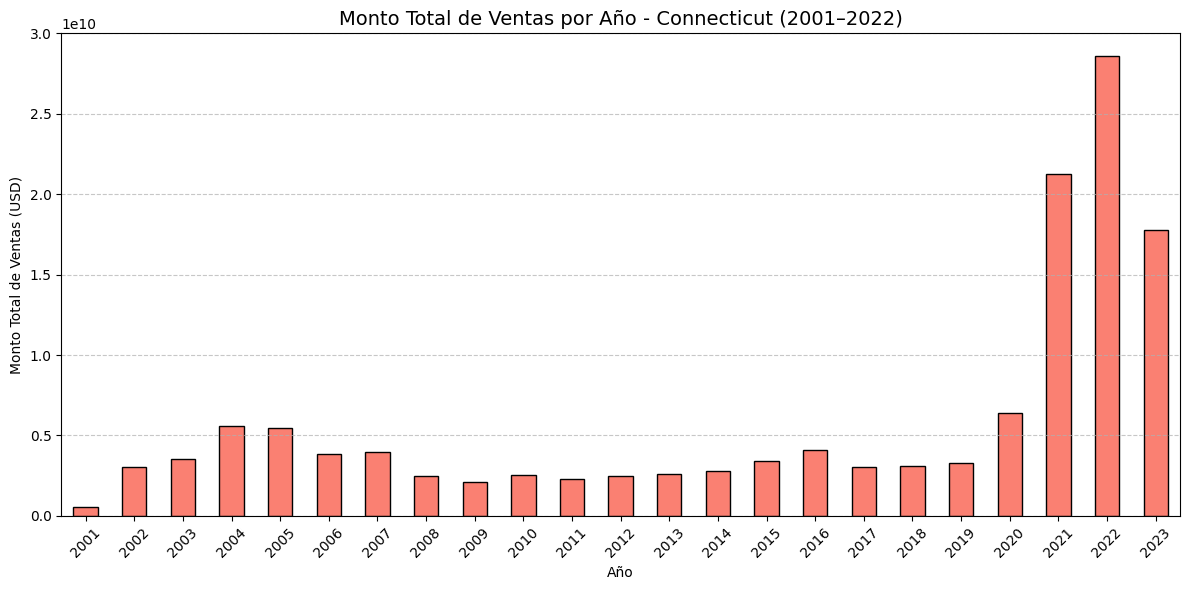

In [66]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt


# Asegurar que 'Sale Date' esté en formato datetime
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')

# Eliminar filas sin fecha válida
df = df[df['Date Recorded'].notna()]

# Convertir columna de montos a numérica (por si hay strings o caracteres)
df['Sale Amount'] = pd.to_numeric(df['Sale Amount'], errors='coerce')

# Eliminar filas sin monto válido
df = df[df['Sale Amount'].notna()]

# Crear columna 'Year' a partir de la fecha
df['Year'] = df['Date Recorded'].dt.year

# Agrupar por año y sumar montos
total_sales_by_year = df.groupby('Year')['Sale Amount'].sum()

# Graficar
plt.figure(figsize=(12, 6))
total_sales_by_year.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Monto Total de Ventas por Año - Connecticut (2001–2022)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Monto Total de Ventas (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
